<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/titanic_You_Han_Lee_csv_multiple_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 로드 & 기본환경설정

In [55]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [56]:
#시각화를 위한 테마 설정
plt.style.use('ggplot')
#그래프를 선명하게
set_matplotlib_formats('svg')

#데이터 가져오기 & 미리보기


In [63]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/You_Han_Lee_titanic_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/You_Han_Lee_titanic_test.csv")

In [64]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [65]:
test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


#머신러닝

##훈련, 예측 데이터 준비

In [66]:
X_train = train.loc[:,"Pclass":]
y_train = train['Survived']
X_test = test.loc[:,:]

In [67]:
print(X_train.shape)
X_train.head()

(891, 13)


,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [68]:
print(y_train.shape)

(891,)


In [69]:
print(X_test.shape)
X_test.head()

(418, 13)


,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


##훈련 및 하이퍼 파라미터 튜닝

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 GradientBoost

In [71]:
from sklearn.model_selection import GridSearchCV
max_depth = np.arange(1,10,1)
max_features = np.arange(0.1, 1.0, 0.1)
max_leaf_nodes = np.arange(1,10,1)

results = []
for estimator in estimators:
  result = []
  param_grid = {"max_depth" : max_depth,
                "max_features" : max_features,
                "max_leaf_nodes" : max_leaf_nodes
                }
                
  grid = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1,cv=5,verbose=2)
  grid.fit(X_train,y_train)
  result.append(estimator.__class__.__name__)
  result.append(grid.best_estimator_)
  result.append(grid.best_params_)
  result.append(grid.best_score_)
  results.append(result)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3628 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 3642 out of 3645 | elapsed:   14.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3642 out of 3645 | elapsed:  7.8min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  7.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2556 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  3.5min finished


In [72]:
results_df = pd.DataFrame(results)
results_df.columns = ['estimator', 'best_estimator', 'best_param', 'best_score']
results_df

,estimator,best_estimator,best_param,best_score
0,DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","{'max_depth': 4, 'max_features': 0.9, 'max_lea...",0.831636
1,RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...","{'max_depth': 6, 'max_features': 0.4, 'max_lea...",0.836118
2,GradientBoostingClassifier,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...","{'max_depth': 4, 'max_features': 0.6, 'max_lea...",0.844027


In [78]:
best_estimator = results_df.loc[2]['best_estimator']

In [80]:
print(best_estimator.feature_importances_)

[0.13639039 0.09295834 0.20594858 0.06731485 0.04841154 0.01958726
 0.00325269 0.36318668 0.01593432 0.02360711 0.00594334 0.00394647
 0.01351845]


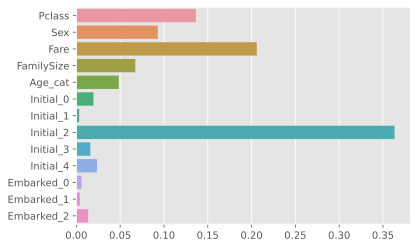

In [81]:
sns.barplot(x=best_estimator.feature_importances_, y=X_train.columns)

In [82]:
y_pred = best_estimator.predict(X_test)

In [83]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
submit['Survived'] = y_pred

In [85]:
(submit['Survived'] != y_pred).sum()

0

In [86]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
submit.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/You_Han_Lee_csv_titanic_submit.csv", index=False)

In [88]:
first_submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/You_Han_Lee_csv_titanic_submit.csv')
first_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
